In [69]:
import numpy as np
import itertools as itt
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt
import networkx as nx
import math
import os
import csv

# parameters for eps, del, the
e = 0.25
d = 0.5
t = 1

# creating powersets function
def powerset(j):
    ps = [] # power set of parent set
    xs = np.arange(1,j+1)
    for i in range(0, j+1):
        for subset in itt.combinations(xs, i):
            ps.append(subset)
    return(ps)

# generating weight matrix function
def weight_matrix(matrix_size, p, q):
    mat = np.zeros((matrix_size, matrix_size))

    sc_p = (p*10)/matrix_size
    sc_q = (q*10)/matrix_size

    print(sc_p)
    print(sc_q)

    possible_vals = (-1,1,2)
    weights = (1-p,sc_p*(1-sc_q),sc_p*sc_q)

    for i in range(matrix_size):
        for j in range(matrix_size):
            if i == j:
                continue
            else:
                mat[i,j] = np.random.choice(possible_vals, 1, weights)[0]

    for i in range(matrix_size):
        for j in range(matrix_size):
            # if mat[i,j] == -2:
            #     mat[i,j] = -1-d
            #     mat[j,i] = -1-d
            if mat[i,j] == 2:
                mat[i,j] = -1+e
                mat[j,i] = -1+e
            if mat[i,j] == -1:
                mat[i,j] = -1-d
            if mat[i,j] == 1:
                mat[i,j] = -1+e
                mat[j,i] = -1-d

    print(mat)
    return(mat)

def mat_graph(mat):
    mat_graph = mat.copy()

    for i in range(matrix_size):
        for j in range(matrix_size):
            if mat_graph[i,j] == -1-d:
                mat_graph[i,j] = 0
            if mat_graph[i,j] == -1+e:
                mat_graph[i,j] = 1
    return(mat_graph)

# checking fixed points

def check_fp(weight_matrix, fixed_point, theta, theta_sig):
    checker = []
    for i in range(matrix_size):
        Wx = weight_matrix[i,:]@fixed_point + theta[i]
        # print(Wx)
        if theta_sig[i] > 0:
            if Wx > 0:
                checker.append(1)
            else:
                checker.append(0)
        else:
            if Wx > 0:
                checker.append(0)
            else:
                checker.append(1)
    return(checker)

# stability analysis
def stability(W_sigma):
    eigvals = np.linalg.eigvals(W_sigma)
    if min(eigvals) < 0:
        return('Stable')
    else:
        return('Unstable')




In [70]:
#input weight matrix
matrix_size = int(input('matrix size?\n'))
W = weight_matrix(matrix_size,0.6,0.1)
symmetry_param = (0.1/0.6)
J = mat_graph(W)
# print(f'The relevant values of sigma are {ps}')
# print(W)
A = np.copy(W)
# print(J)

0.6
0.1
[[ 0.   -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -0.75 -1.5  -0.75]
 [-0.75  0.   -0.75 -0.75 -1.5  -0.75 -0.75 -0.75 -0.75 -1.5 ]
 [-0.75 -1.5   0.   -0.75 -0.75 -1.5  -1.5  -0.75 -0.75 -0.75]
 [-1.5  -1.5  -1.5   0.   -0.75 -0.75 -0.75 -0.75 -0.75 -0.75]
 [-0.75 -1.5  -0.75 -1.5   0.   -0.75 -0.75 -0.75 -0.75 -0.75]
 [-0.75 -0.75 -0.75 -0.75 -1.5   0.   -0.75 -1.5  -0.75 -1.5 ]
 [-0.75 -1.5  -1.5  -1.5  -0.75 -0.75  0.   -0.75 -0.75 -0.75]
 [-1.5  -1.5  -1.5  -0.75 -0.75 -0.75 -0.75  0.   -0.75 -0.75]
 [-1.5  -0.75 -1.5  -1.5  -0.75 -0.75 -0.75 -0.75  0.   -1.5 ]
 [-0.75 -1.5  -0.75 -0.75 -1.5  -0.75 -0.75 -0.75 -1.5   0.  ]]


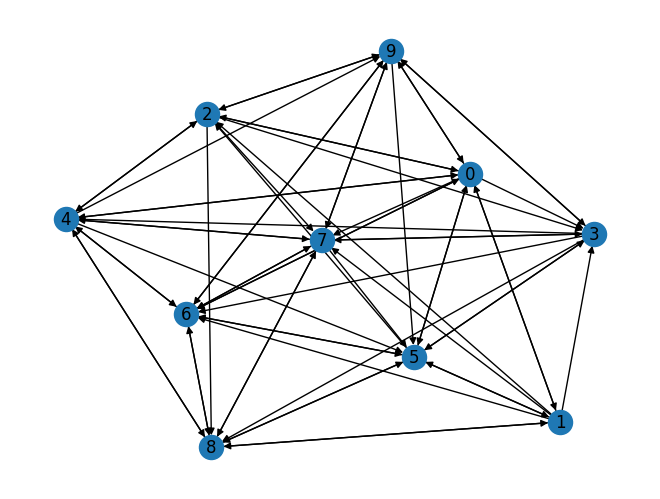

In [71]:
G = nx.DiGraph(J>0)
nx.draw_kamada_kawai(G, with_labels=True)

In [72]:
#input powerset
ps = powerset(matrix_size)

In [73]:
# dictionary for fp supports
supports = {}

# finding fixed points
for sigma in ps: # index of entry in power set
    W = np.copy(A) # weight matrix
    theta = np.ones((matrix_size, 1)) # theta
    t_s = np.copy(theta) # theta_sigma
    # print(ps.index(sigma))
    deac_neur = ps[ps.index(sigma)] #deactivated neurons
    if sigma:
        for iter in deac_neur:
            W[iter-1, :] = 0
            inverse = np.linalg.inv(np.identity(matrix_size) - W)   
            t_s[iter-1, :] = 0
            P = np.round(np.matmul(inverse, t_s), 4)
        # print(P)
        checker = check_fp(A, P, theta, t_s)

    else:
        inverse = np.linalg.inv(np.identity(matrix_size) - W)
        P = np.round(np.matmul(inverse, t_s), 4)
        # print(P)
        checker = check_fp(A, P, theta, t_s)

    if np.all(checker) == True:
        supports[tuple(np.setdiff1d(np.arange(1, matrix_size+1), deac_neur))] = tuple(P)
        print(stability(W))
    

# print(supports)
# print(W_s)
print(pd.DataFrame.from_dict(supports, orient='index'))

Stable
Stable
Stable
Stable
Stable
Stable
Stable
Stable
Stable
Stable
Stable
                                 0         1         2         3         4  \
(1, 2, 3, 4, 5, 7, 8, 9)  [0.0958]  [0.1333]  [0.0333]  [0.0726]  [0.2422]   
(2, 3, 4, 5, 6, 8, 9)        [0.0]   [0.169]  [0.0937]   [0.032]   [0.217]   
(1, 2, 4, 5, 7, 8, 9)     [0.1223]  [0.1223]     [0.0]  [0.0699]  [0.2271]   
(1, 2, 5, 6, 7, 9)        [0.1818]  [0.1818]     [0.0]     [0.0]  [0.1818]   
(1, 2, 5, 6, 7)           [0.5714]  [0.1429]     [0.0]     [0.0]  [0.1429]   
(1, 3, 5, 7)              [0.4706]     [0.0]  [0.1176]     [0.0]  [0.4706]   
(1, 2, 6, 9)              [0.1176]  [0.4706]     [0.0]     [0.0]     [0.0]   
(2, 6, 9)                   [-0.0]     [0.4]     [0.0]     [0.0]     [0.0]   
(1, 5, 7)                    [0.4]     [0.0]     [0.0]     [0.0]     [0.4]   
(1, 3, 5)                    [0.4]     [0.0]     [0.4]     [0.0]     [0.4]   
(1, 2, 6)                    [0.4]     [0.4]     [0.0]     [0.0] 

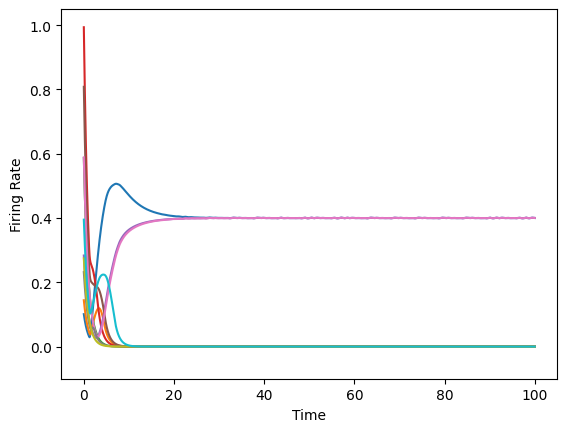

In [74]:
def sys(t, x):
    # x1, x2 = x    
    dxdt = (-x + np.maximum(0, A@x + 1))
    return dxdt


x0 = np.random.rand(matrix_size, 1)
time = [0, 100]

x = scp.integrate.solve_ivp(sys, time, x0.flatten(), dense_output=True)
t = np.linspace(0,100, 10001)

# plot against time
plot1 = plt.plot(t, (x.sol(t)).T)
plt.ylim([-0.1,1.05])

plt.xlabel('Time')
plt.ylabel('Firing Rate')

filename1 = 'Graphs and CSVs/Matrix Size ' + str(matrix_size) + ' Symmetry ' + '{:.3f}'.format(symmetry_param)
i = 0
while os.path.exists(f"{filename1} {i}.png"):
    i += 1

filename2 = 'Graphs and CSVs/Matrix Size ' + str(matrix_size) + ' Symmetry ' + '{:.3f}'.format(symmetry_param)
i = 0
while os.path.exists(f"{filename2} {i}.csv"):
    i += 1

plt.savefig(f"{filename1} {i}.png", dpi=720)

corr_mat = pd.DataFrame(W)
corr_mat.to_csv(f"{filename2} {i}.csv")

# plot on phase portrait
# plt.xlim([0,1])
# plt.ylim([0,1])
# plot2 = plt.plot(x.sol(t)[0], x.sol(t)[1])
    # i=i+1
plt.show()